## Amazon Delivery Time Prediction - Exploratory Data Analysis (EDA)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [38]:
df = pd.read_csv('cleaned_data.csv')

### Analyze delivery time distributions and patterns

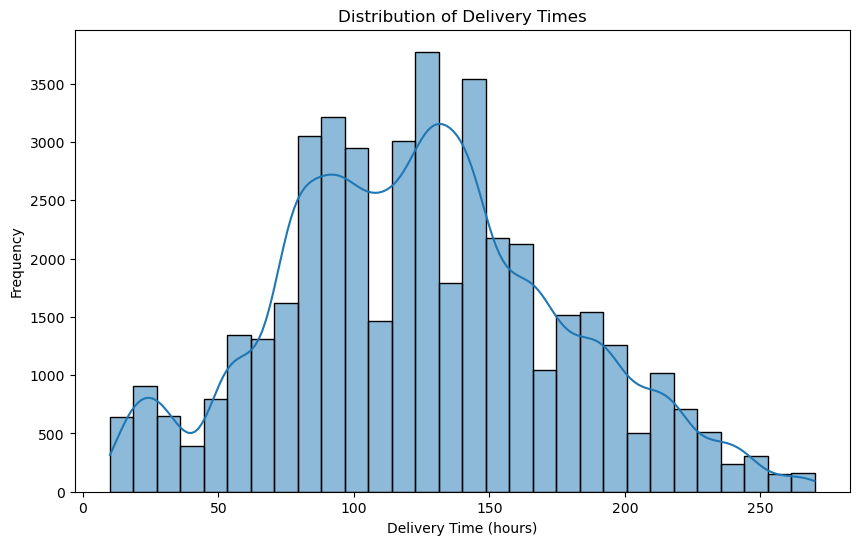

In [40]:
# Delivery time distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], kde=True, bins=30)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()

**Observation:**
1. The distribution appears to be slightly right-skewed.
2. The majority of delivery times fall between 100 and 150 hours, where the frequency is the highest.
3. Delivery times range from 0 to about 260 hours.

([0, 1, 2, 3],
 [Text(0, 0, 'motorcycle '),
  Text(1, 0, 'scooter '),
  Text(2, 0, 'van'),
  Text(3, 0, 'bicycle ')])

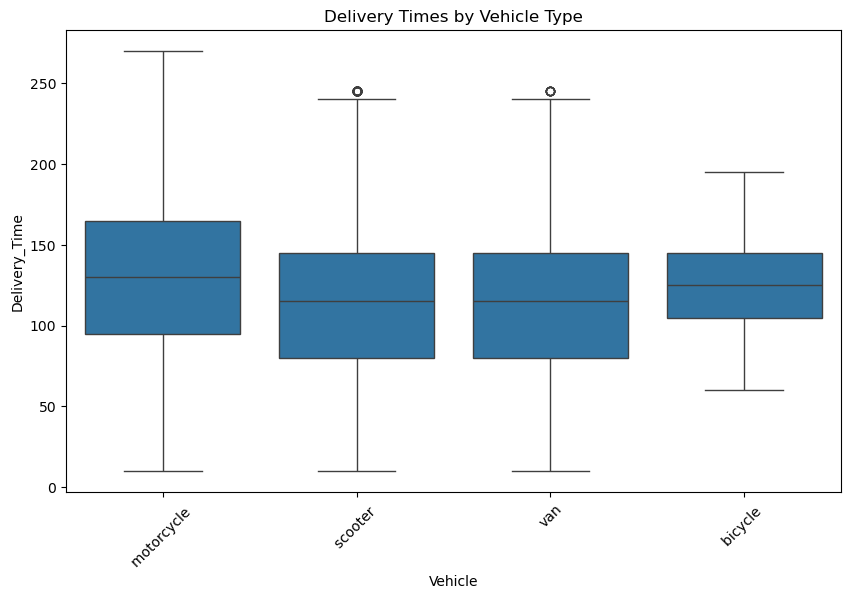

In [42]:
# Box plot of delivery times by vehicle
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle', y='Delivery_Time', data=df)
plt.title('Delivery Times by Vehicle Type')
plt.xticks(rotation=45)

**Observation:**
1. Motorcycles, scooters, and vans have similar median delivery times, around 100–150 hours.
2. Bicycles have a slightly lower median delivery time compared to the other vehicles.
3. Motorcycles and vans is the largest, suggesting higher variability in delivery times.
4. Bicycles have the smallest range, indicating more consistent delivery times.
5. There are outliers visible for scooters and vans

### Analyze impact of weather and traffic on delivery times

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Sunny'),
  Text(1, 0, 'Stormy'),
  Text(2, 0, 'Sandstorms'),
  Text(3, 0, 'Cloudy'),
  Text(4, 0, 'Fog'),
  Text(5, 0, 'Windy')])

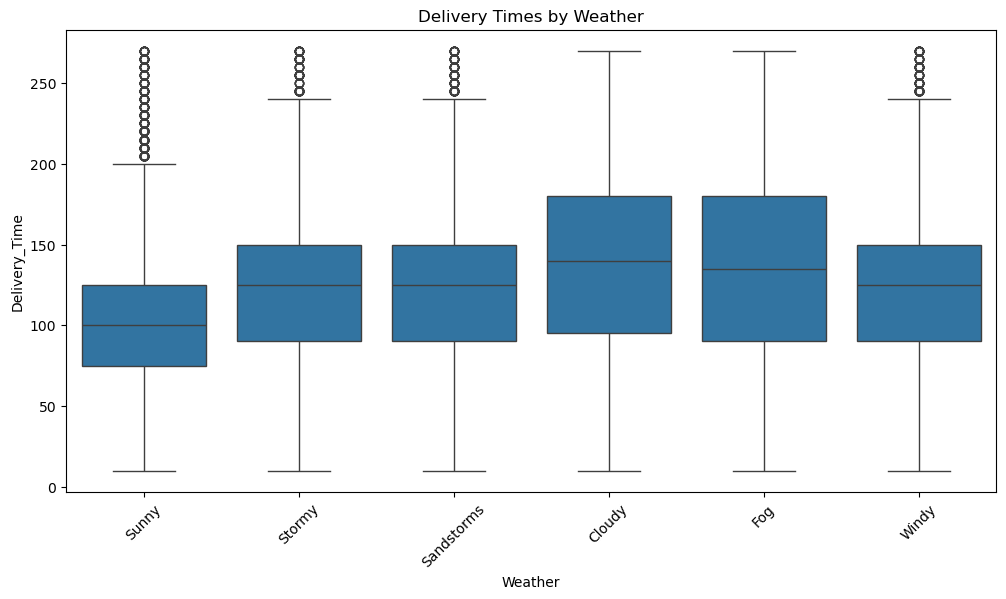

In [44]:
# Weather impact

plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Delivery_Time', data=df)
plt.title('Delivery Times by Weather')
plt.xticks(rotation=45)

**Observation:**
1. Weather seems to impact delivery times, with clear weather (sunny) generally resulting in faster deliveries
2. Poor visibility conditions (cloudy, foggy) tend to result in longer and more variable delivery times
3. Extreme weather conditions (stormy, sandstorms, windy) show moderate impact on delivery times
4. There are multiple outliers across all weather types, particularly in sunny, stormy, and sandstorm conditions

Text(0.5, 1.0, 'Delivery Times by Traffic')

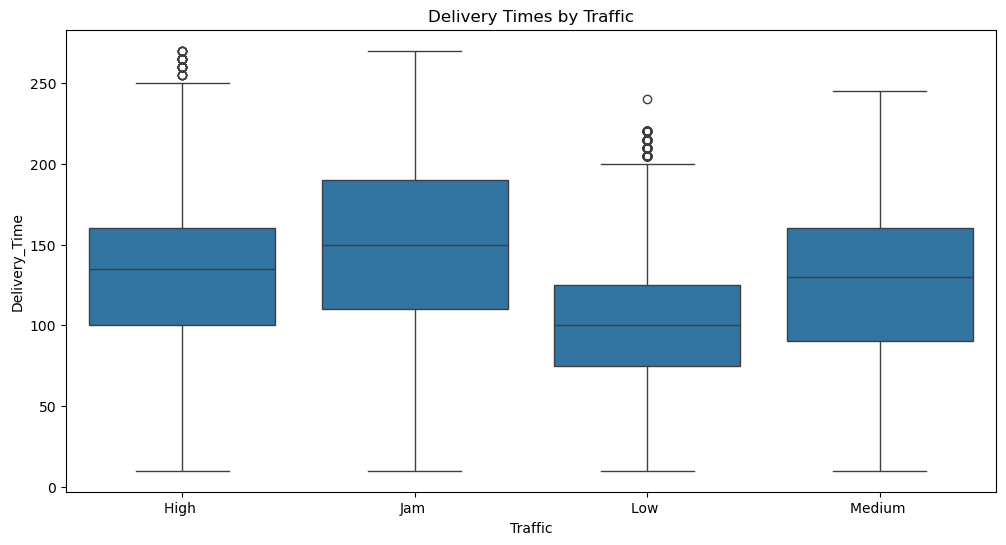

In [46]:
# Traffic impact

plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df)
plt.title('Delivery Times by Traffic')

**Observation:**
1. The median delivery time appears to be highest during "Jam" traffic conditions (around 150-160).
2. "High" and "Medium" traffic show roughly similar median delivery times, slightly lower than "Jam."
3. "Low" traffic exhibits the lowest median delivery time (around 120).
4. "High" and "Low" traffic conditions have a few identified outliers, representing unusually long delivery times for those categories.

Text(0.5, 1.0, 'Delivery Times by Area')

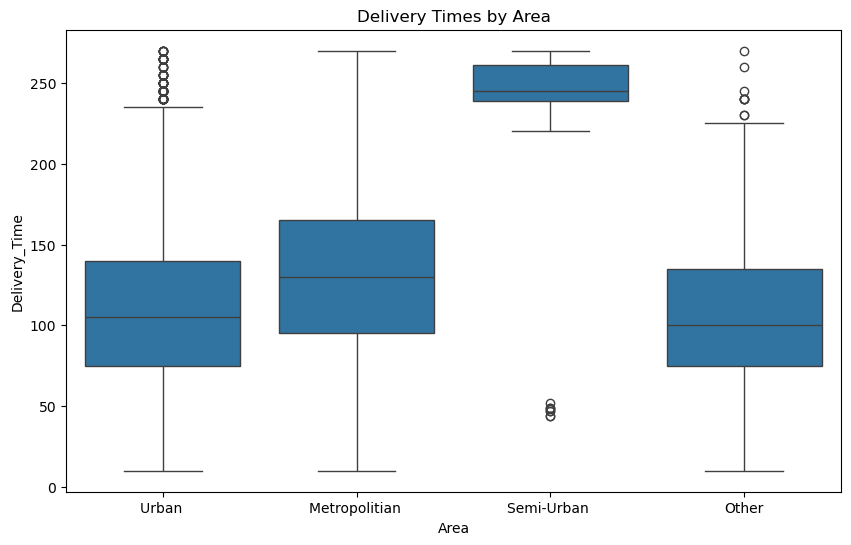

In [50]:
# Area impact
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Delivery_Time', data=df)
plt.title('Delivery Times by Area')

**Observation:**
1. Semi-Urban areas have the highest median delivery time (around 250-260).
2. Metropolitan areas show lower median delivery time (around 120-130).
3. Urban and Other areas have similar median delivery times, falling between Metropolitan and Semi-Urban.
4. Urban and Other areas have several identified outliers on the higher end, indicating unusually long delivery times.
5. Semi-Urban areas have a few outliers on the lower end, suggesting unusually short delivery times

### Analyze correlations between numerical variables

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

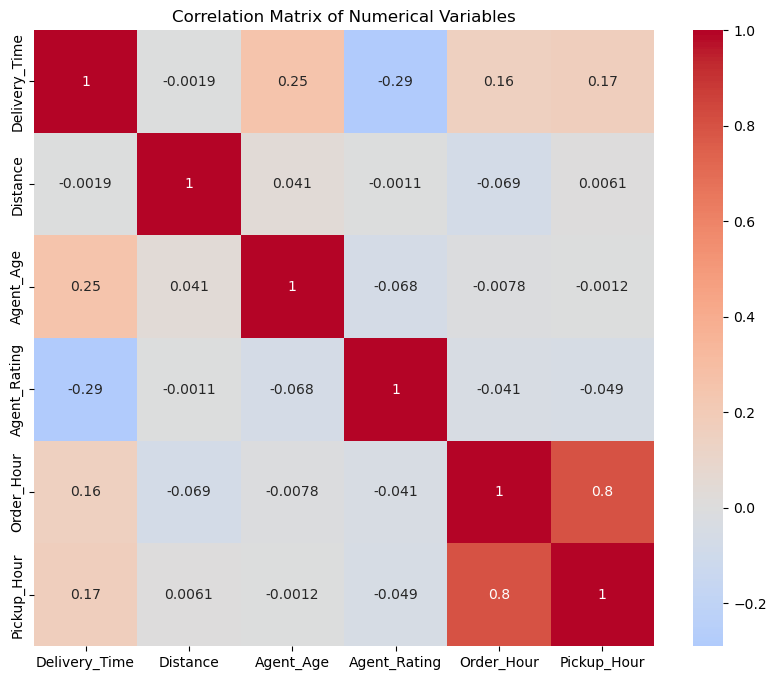

In [54]:
# Select numerical columns
numerical_cols = ['Delivery_Time', 'Distance', 'Agent_Age', 'Agent_Rating', 
                     'Order_Hour', 'Pickup_Hour']
    
# Create correlation matrix
corr_matrix = df[numerical_cols].corr()
    
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')

**Observation:**
1. Order_Hour and Pickup_Hour (0.8): This strong positive correlation is expected. Orders placed earlier in the day are likely to be picked up earlier.
2. Pickup_Hour and Order_Hour (0.8): As mentioned above, correlation is symmetrical.
3. The weak correlation between distance and delivery time

### Generate key insights from the data

In [58]:
def generate_insights(df):
    insights = {
        'avg_delivery_time': df['Delivery_Time'].mean(),
        'med_delivery_time': df['Delivery_Time'].median(),
        'best_performing_vehicle': df.groupby('Vehicle')['Delivery_Time'].mean().idxmin(),
        'worst_weather_condition': df.groupby('Weather')['Delivery_Time'].mean().idxmax(),
        'avg_distance': df['Distance'].mean(),
        'avg_agent_rating': df['Agent_Rating'].mean()
    }
    
    # Print insights
    print("\nKey Insights:")
    for key, value in insights.items():
        if isinstance(value, (int, float)):
            print(f"{key}: {value:.2f}")
        else:
            print(f"{key}: {value}")
    return insights

In [60]:
insights = generate_insights(df)


Key Insights:
avg_delivery_time: 124.91
med_delivery_time: 125.00
best_performing_vehicle: van
worst_weather_condition: Cloudy
avg_distance: 38.46
avg_agent_rating: 4.63
